# Titanic Disaster Survival Using Logistic Regression

Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


Load Data

In [46]:
df = pd.read_csv("titanic.csv")

In [47]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

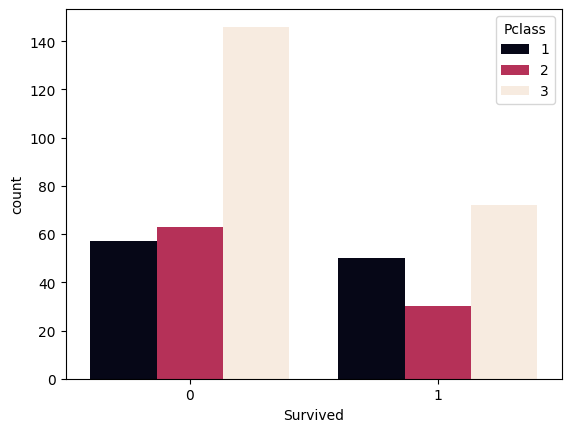

In [7]:
sns.countplot(x=df['Survived'], hue = df['Pclass'], palette='rocket')

<Axes: xlabel='Sex', ylabel='count'>

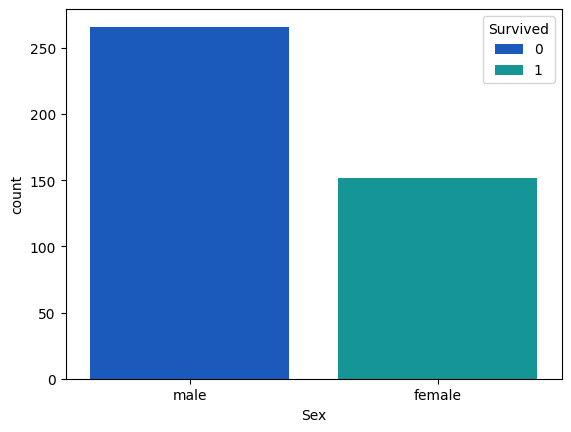

In [8]:
sns.countplot(x=df['Sex'] , hue=df['Survived'], palette=('winter'))

Text(0.5, 1.0, 'Age Distribution by Survival')

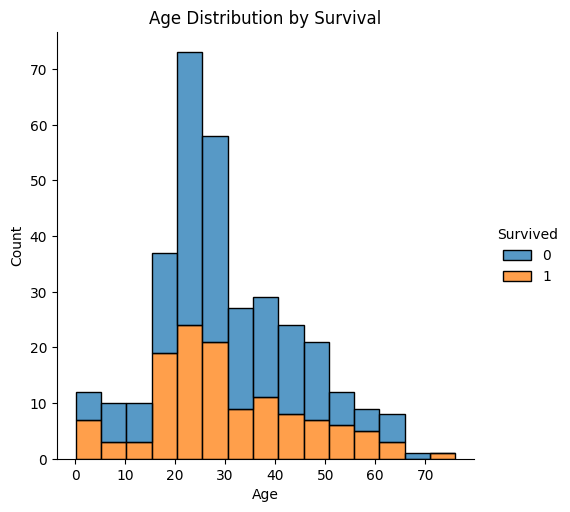

In [9]:
sns.displot(x=df['Age'], hue=df['Survived'], multiple='stack')
plt.title("Age Distribution by Survival")

## Data Cleaning

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

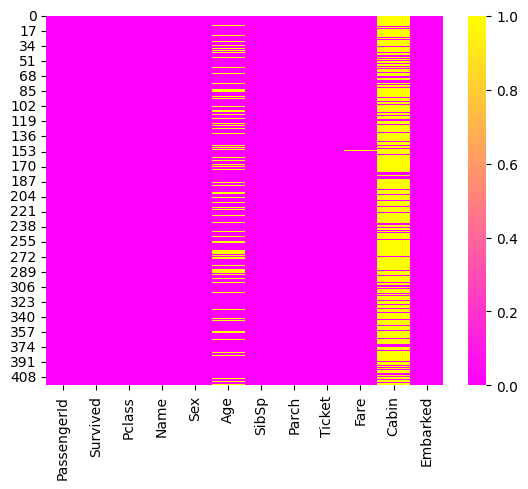

In [11]:
sns.heatmap(df.isna(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

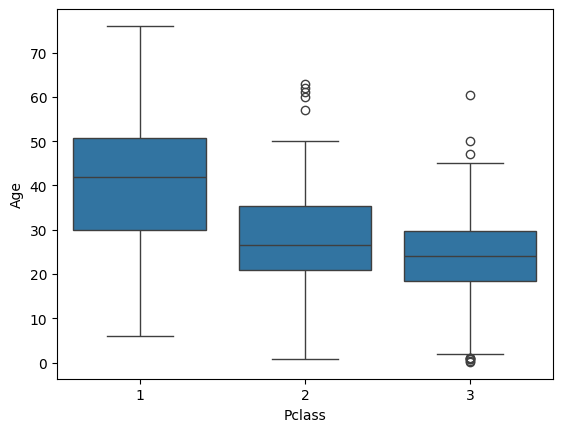

In [12]:
sns.boxplot(x=df['Pclass'], y = df['Age'])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df.drop('Cabin', axis=1, inplace=True)

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [16]:
df['Age'].isna().sum()

0

<Axes: >

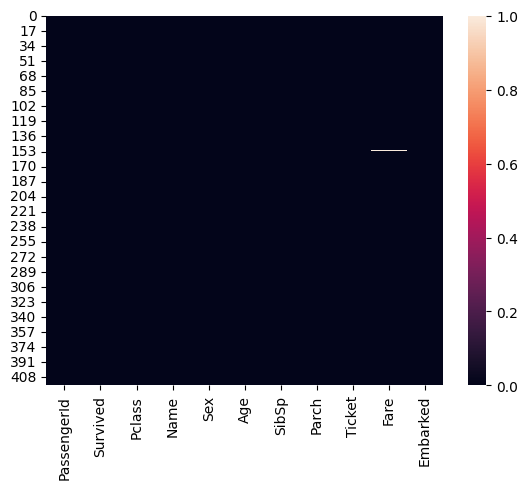

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [19]:
gender=pd.get_dummies(df['Sex'], drop_first= True)

In [20]:
df['Gender']=gender

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,False
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,True
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,True
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,True


In [22]:
df.drop(['Name', 'Sex', 'Ticket', 'Embarked','Fare' ], axis=1, inplace = True )

In [23]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Gender         0
dtype: int64

<Axes: >

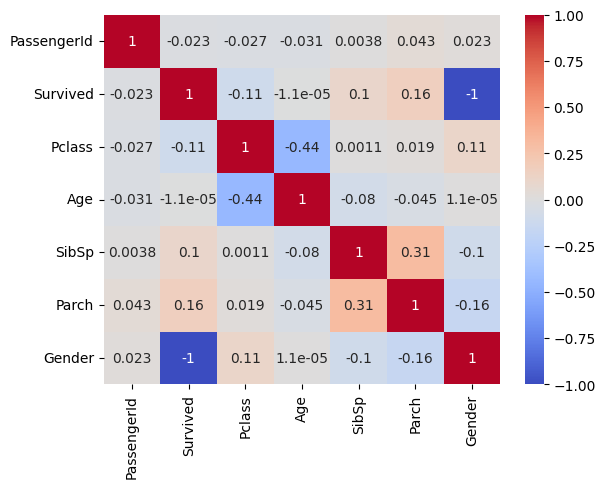

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Survived'>

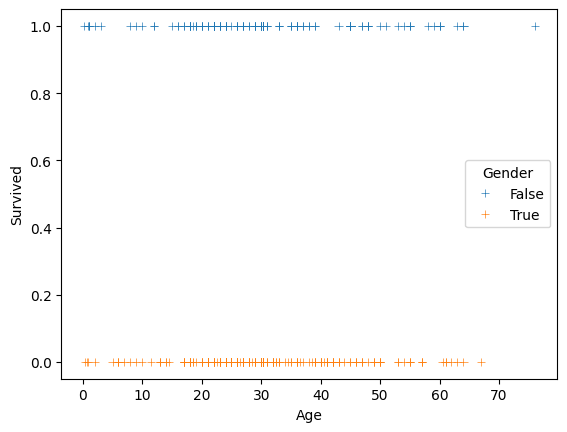

In [25]:
sns.scatterplot(x=df["Age"],y=df["Survived"], marker='+', hue=df['Gender'])

In [26]:
 x = df[['PassengerId','Pclass','Age','SibSp','Parch','Gender']]
 y = df['Survived']

In [27]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Gender
0,892,3,34.50000,0,0,True
1,893,3,47.00000,1,0,False
2,894,2,62.00000,0,0,True
3,895,3,27.00000,0,0,True
4,896,3,22.00000,1,1,False
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,True
414,1306,1,39.00000,0,0,False
415,1307,3,38.50000,0,0,True
416,1308,3,30.27259,0,0,True


In [28]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Data Modelling

## Building Model using Logestic Regression

### Build the model

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=200)

In [30]:
print(x_test.shape)
print(y_test.shape)


(84, 6)
(84,)


In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predict = lr.predict(x_test)

In [34]:
lr.score(x_test,y_test)

1.0

In [41]:
print(y_test.shape)
print(predict.shape)


(84,)
(84,)


## Testing

In [ ]:
confusion_matrix(y_test,predict)

In [42]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,58,0
Actual Yes,0,26


In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [44]:
accuracy_score(y_test,predict)

1.0

Text(50.722222222222214, 0.5, 'Actual')

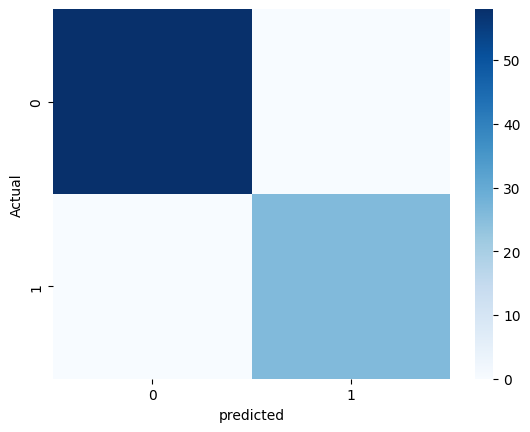

In [45]:
sns.heatmap(confusion_matrix(y_test,predict),cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')